# Testing the validity of filters

In this example we compare the digital filter with the analytical fullspace solution for a wide range of frequencies and resistivities (simple case: `aniso = 1`, `epermH = epermV = 1`, `mpermH = mpermV = 1`). 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import mu_0, epsilon_0

from empymod import dipole, utils
utils.set_minimum(min_off=1e-50)

# Style adjustments
%matplotlib inline
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['text.usetex'] = True  # Comment this if you don't have LaTeX. You might have to adjust some strings.
plt.rcParams['font.serif'] = 'Computer Modern Roman'
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.style'] = 'normal'

## Offset

We define the offset as a function of the skin depth $\delta$, defined by

$$
\delta = \left[\omega \sqrt{\mu\varepsilon/2}
\sqrt{\left(1 + 1/(\omega\varepsilon\rho)^2 \right) -1}\right]^{-1} \, . \\
$$

In [2]:
# Define powers of frequency
fexp = np.arange(-10., 14.1, 1.)

# Define powers of resistivity
rexp = np.arange(-10, 10.1, 0.5)

# Fixed parameters
params = {'src': [0, 0, 0],
          'depth': [],
          'ht': 'fht',
          'htarg': 'wer_201_2018',
          'verb': 1}

def calc_data(fact):

    # Pre-allocate output arrays
    error = np.ones((len(fexp), len(rexp)))
    ansol = np.ones((len(fexp), len(rexp)))
    offs = np.ones((len(fexp), len(rexp)))

    # Loop over frequencies
    for i, val in enumerate(fexp):

        # Get frequency
        freq = 10**val

        # Loop over resistivities
        for ii, val2 in enumerate(rexp):

            # Get this resistivity
            res = 10**val2

            # Calculate skin depth
            omega = 2*np.pi*freq
            delta = np.sqrt(2/(mu_0*epsilon_0*omega**2))/np.sqrt(np.sqrt(1 + (1/(res*omega*epsilon_0))**2) - 1)

            # Set offset to skin_depth*fact
            off = fact*delta
            offs[i, ii] = off

            # Define this receiver
            rec = [off, 0, off/10]

            # Get analytical result (xdirect=True) and store
            an_out = dipole(rec=rec, res=res, freqtime=freq, xdirect=True, **params)
            ansol[i, ii] = np.abs(an_out)

            # Get filter result (xdirect=False), store relative error
            dlf_out = dipole(rec=rec, res=res, freqtime=freq, xdirect=False, **params)
            error[i, ii] = np.abs((dlf_out-an_out)/an_out)

    return error, ansol, offs

def plot_data(error, ansol, offs, fact):
    # Figure
    plt.figure(figsize=(10, 4))

    # Get x- and y- axis
    x = np.r_[rexp-0.25, rexp[-1]+0.25]
    y = np.r_[fexp-0.5, fexp[-1]+0.5]

    # Plot amplitude
    plt.subplot(121)
    plt.title('(a) Amplitude of analytical solution')

    CP1 = plt.pcolormesh(x, y, np.log10(ansol), linewidth=0, rasterized=True)
    plt.colorbar(CP1)

    CS1 = plt.contour(np.log10(offs), cmap='gray', extent=[x[0], x[-1], y[0], y[-1]])
    plt.clabel(CS1, fmt='%1i', inline_spacing=25,fontsize=10)

    plt.xlabel(r'Resistivity $\log_{10}(\rho)$')
    plt.ylabel(r'Frequency $\log_{10}(f)$')
    plt.yticks(fexp[::4])
    plt.xticks(rexp[::8])

    # Plot error
    plt.subplot(122)
    plt.title('(b) Relative error ($-$)')

    CP2 = plt.pcolormesh(x, y, np.log10(error), linewidth=0, rasterized=True)
    plt.colorbar(CP2)

    CS2 = plt.contour(np.log10(offs), cmap='gray', extent=[x[0], x[-1], y[0], y[-1]])
    plt.clabel(CS2, fmt='%1i', inline_spacing=25,fontsize=10)

    plt.xlabel(r'Resistivity $\log_{10}(\rho)$')
    plt.ylabel(r'Frequency $\log_{10}(f)$')
    plt.yticks(fexp[::4])
    plt.xticks(rexp[::8])

    # Title
    plt.suptitle('Hor. offset = '+str(fact)+'$*\delta$; vertical src-rec sep. = '+str(fact/10)+'$*\delta$.')

    plt.savefig('../figures/validity_'+str(fact)+'.pdf', bbox_inches='tight')
    plt.show()

### Case 1: Hor. offset = $\delta$

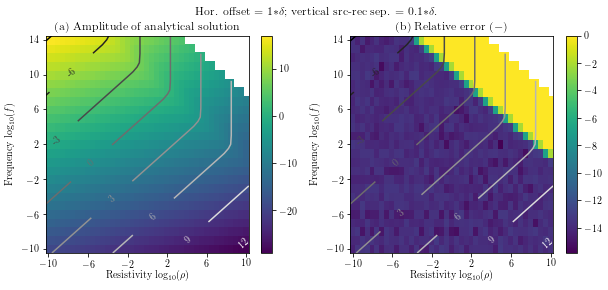

In [3]:
fact = 1
error, ansol, offs = calc_data(fact)
plot_data(error, ansol, offs, fact)

The contour-labels show the power of the offset in meters. E.g., the line with $0$ indicates $10^0\,$m, hence $1\,$m; the line with $3$ indicates $1\,$km offset, etc.

### Case 2: Hor. offset = $10*\delta$

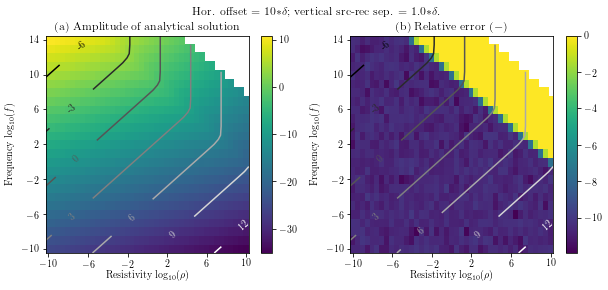

In [4]:
fact = 10
error, ansol, offs = calc_data(fact)
plot_data(error, ansol, offs, fact)

### Case 1: Hor. offset = $0.1*\delta$

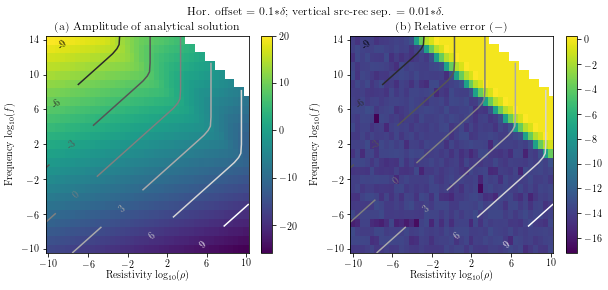

In [5]:
fact = 0.1
error, ansol, offs = calc_data(fact)
plot_data(error, ansol, offs, fact)

In [6]:
import printinfo
printinfo.info()